# Chiranth changappa (PGAA-02)

# Capstone project 

# Problem Statement

A friendly foodie community in Bengaluru formed by 20 students has conducted a survey on Food Restaurant reviews. With the analysis of the survey, the community came to know that many restaurant owners are willing to know their customer’s opinion in terms of the ratings given by them but most of them are not willing to know their customer’s opinion in terms of reviews. Usually few customers give only review, few give only rating and few give both review and rating. The foodie community has collected all the raw data from restaurant managers and they have promised to help them in knowing the rating incase if customer has given only a review.

# Goal/Objective

Assume you are one among the 20 members of the community and you want to make their job easier in helping restaurant managers, build a classification model which predicts the rating based on the customer reviews and other parameters

# Data Description

Data is collected from multiple restaurants around the city of Bengaluru.

# Attribute Information

1. Restaurant_Name: Consists of restaurant name.
2. Reviewer_Name: Name of the customer who gave review.
3. Review_Text: Actual body of the review.
4. Rating(1 - 5): Target variable ranges from 1 to 5.
5. Reviews & Followers: Gives count of reviews and followers.
6. Time: Time the review has given.
7. Pictures_uploaded: How many food and restaurant pictures the
customer has uploaded along with a review

# AIM : TO PREDICT THE MOVIE RATING OF RESTAURANTS IN BANGALORE DEPENDS ON REVIEW TEXT

1. **[IMPORTING LIBRARIES](#import_lib)**
2. **[Loading Data](#load_data)**
3. **[Feature Engineering](#feature)**
4. **[Exploratory Data Analysis](#eda)**
5. **[NLP Techniques](#nlp)**
6. **[Label Encoding](#label)**
7. **[Target Variable analysis](#target)**
8. **[Model Building](#base)**
9. **[Handling imbalanced dataset using Oversampling technique(Random Oversampler)](#oversampler)**
10. **[Test data](#test)**
11. **[Using Best Classifier to predict the test data - Random Forest](#rf)**
12. **[Exporting Dataframe to csv](#export)**

<a id='import_lib'></a>
# 1.  IMPORTING LIBRARIES


In [193]:
#Importing required library for mathematical operations, data manupulation and to make 2d and 3d plots 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#regular expression imports
import re
#the Natural Language Toolkit (NLTK) is a use to understand human language data applying in statistical natural language processing .
import nltk
#'stopwords used to remove most commonly used word such as 'a, an, the, this etc'
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# train test split is a technique used for spliting of dataset to train and test
from sklearn.model_selection import train_test_split


# To Converts group of words into a matrix, showing each words frequency
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import scipy.sparse

# to encode varibales 
from sklearn.preprocessing import LabelEncoder
#standardizing the df_final
from sklearn.preprocessing import Normalizer


# import libraries for building different model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
#metrics evaluation 
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,f1_score,confusion_matrix,classification_report,cohen_kappa_score

# to balance any feature(Target variable)  
from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package stopwords to C:\Users\Chiranth
[nltk_data]     SB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='load_data'></a>
# 2.LOADING DATA

In [235]:
#reading excel file using pandas library
df = pd.read_excel('Foodie_Community_Train.xlsx')
#display top 5 records of the data
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers,Time,Pictures_uploaded
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4,1 Review,2019-05-18 01:35:00.000000,0
1,Dine O China,Swarn Lata Singh,poor quality,2,"8 Reviews , 4 Followers",2018-08-11 14:44:00.000000,0
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1,"1 Review , 1 Follower",2018-10-02 14:40:00.000000,0
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5,"36 Reviews , 2045 Followers",2018-08-18 23:20:00.000000,3
4,KFC,Umesh Gopu,worst,1,"1 Review , 6 Followers",2018-07-25 20:49:59.999999,0


In [126]:
#checking descriptive features of numeric columns 
df.describe()

,Pictures_uploaded
count,6400.000000
mean,0.718594
std,2.437472
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,52.000000


In [127]:
#df.describe(include='objects')checking descriptive features of catergorical columns
df.describe(include='object')

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers
count,6400,6400,6396,6400,6400
unique,80,5068,6047,10,1884
top,Komatose - Holiday Inn Express & Suites,Parijat Ray,good,5,1 Review
freq,90,11,152,2482,600


In [128]:
#checking null and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Restaurant_Name      6400 non-null   object        
 1   Reviewer_Name        6400 non-null   object        
 2   Review_Text          6396 non-null   object        
 3   Rating(1 - 5)        6400 non-null   object        
 4   Reviews & Followers  6400 non-null   object        
 5   Time                 6400 non-null   datetime64[ns]
 6   Pictures_uploaded    6400 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 350.1+ KB


In [130]:
#checking dimension of dataset
df.shape

(6400, 7)

In [131]:
#checking null values
df.isnull().sum()

Restaurant_Name        0
Reviewer_Name          0
Review_Text            4
Rating(1 - 5)          0
Reviews & Followers    0
Time                   0
Pictures_uploaded      0
dtype: int64

In [132]:
#droping records with null values 
df.dropna(inplace=True)

<a id='feature'></a>
# 3.FEATURE ENGINEERING

In [ ]:
#spliting up reviews and followers
df['list_of_reviews_followers'] = df['Reviews & Followers'].apply(lambda x: x.split(' '))

In [136]:
df['followers'] = df['list_of_reviews_followers'].apply(lambda x: x[-2] if len(x) > 2 else 0)

In [137]:
df['reviews'] = df['list_of_reviews_followers'].apply(lambda x: x[0])

In [138]:
#droping the original 'Reviews & Followers' and 'list_of_reviews_followers' columns 
df.drop(['list_of_reviews_followers', 'Reviews & Followers'], axis=1, inplace=True)

In [140]:
#checking unique elements in target variable
df['Rating(1 - 5)'].unique()

array([4, 2, 1, 5, 3, 3.5, 4.5, 2.5, 1.5, 'Like'], dtype=object)

In [141]:
#replacing 'Like' with mode 
df['Rating(1 - 5)'].replace('Like', df['Rating(1 - 5)'].mode()[0], inplace=True)

In [143]:
#checking shape of target variable
df['Rating(1 - 5)'].shape

(6396,)

In [144]:
#checking top 5 records after feature engineering.
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Time,Pictures_uploaded,followers,reviews
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4.0,2019-05-18 01:35:00.000000,0,0,1
1,Dine O China,Swarn Lata Singh,poor quality,2.0,2018-08-11 14:44:00.000000,0,4,8
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1.0,2018-10-02 14:40:00.000000,0,1,1
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5.0,2018-08-18 23:20:00.000000,3,2045,36
4,KFC,Umesh Gopu,worst,1.0,2018-07-25 20:49:59.999999,0,6,1


<a id='eda'></a>
# 4.EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Rating(1 - 5)', ylabel='count'>

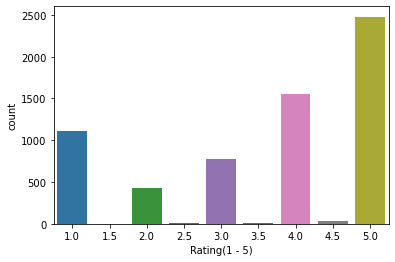

In [145]:
#lets plot a countplot for rating (Target variable)
sns.countplot(df['Rating(1 - 5)'])

In [ ]:
# Highest ratings given is 5.

In [146]:
#converting string object to float(numeric) for column followers and reviews
df['reviews'] = df['reviews'].astype(float)
df['followers'] = df['followers'].astype(float)

<AxesSubplot:xlabel='Rating(1 - 5)', ylabel='reviews'>

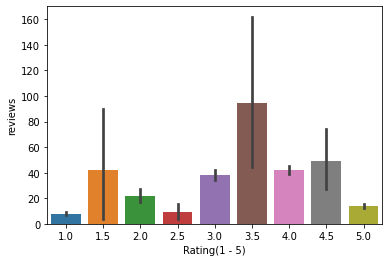

In [147]:
#lets plot a barplot for rating and reviews
sns.barplot(df['Rating(1 - 5)'], df['reviews'])

In [ ]:
# Rating with respect to reviews highest is 3.5 

<AxesSubplot:xlabel='Rating(1 - 5)', ylabel='followers'>

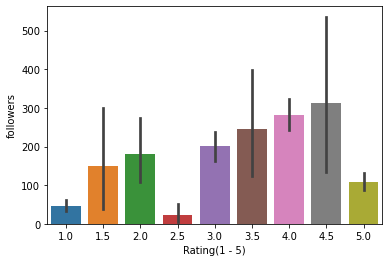

In [148]:
#lets plot a barplot for rating and followers
sns.barplot(df['Rating(1 - 5)'], df['followers'])

In [ ]:
# Followers who follow them has been giving the highest rating of 4.5

In [149]:
#For extracting year,month and day to new column,follow the code:
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['day_of_week'] = df['Time'].dt.dayofweek

In [150]:
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Time,Pictures_uploaded,followers,reviews,year,month,day,hour,day_of_week
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4.0,2019-05-18 01:35:00.000000,0,0.0,1.0,2019,5,18,1,5
1,Dine O China,Swarn Lata Singh,poor quality,2.0,2018-08-11 14:44:00.000000,0,4.0,8.0,2018,8,11,14,5
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1.0,2018-10-02 14:40:00.000000,0,1.0,1.0,2018,10,2,14,1
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5.0,2018-08-18 23:20:00.000000,3,2045.0,36.0,2018,8,18,23,5
4,KFC,Umesh Gopu,worst,1.0,2018-07-25 20:49:59.999999,0,6.0,1.0,2018,7,25,20,2


In [151]:
#droping 'Time' column
df.drop('Time', axis=1, inplace=True)

In [152]:
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Pictures_uploaded,followers,reviews,year,month,day,hour,day_of_week
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4.0,0,0.0,1.0,2019,5,18,1,5
1,Dine O China,Swarn Lata Singh,poor quality,2.0,0,4.0,8.0,2018,8,11,14,5
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1.0,0,1.0,1.0,2018,10,2,14,1
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5.0,3,2045.0,36.0,2018,8,18,23,5
4,KFC,Umesh Gopu,worst,1.0,0,6.0,1.0,2018,7,25,20,2


In [153]:
def food(x):
    if x>=6 and x<=10:
        return 'breakfast'
    elif x>=10 and x<=12:
        return 'brunch'
    elif x>=12 and x<= 15:
        return 'lunch'
    elif x>=15 and x<=19:
        return 'snacks'
    elif x>=19 and x<=22:
        return 'dinner'
    else:
        return 'late night dinner'

In [154]:
df['type_of_food'] = df.hour.apply(food)

In [155]:
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Pictures_uploaded,followers,reviews,year,month,day,hour,day_of_week,type_of_food
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4.0,0,0.0,1.0,2019,5,18,1,5,late night dinner
1,Dine O China,Swarn Lata Singh,poor quality,2.0,0,4.0,8.0,2018,8,11,14,5,lunch
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1.0,0,1.0,1.0,2018,10,2,14,1,lunch
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5.0,3,2045.0,36.0,2018,8,18,23,5,late night dinner
4,KFC,Umesh Gopu,worst,1.0,0,6.0,1.0,2018,7,25,20,2,dinner


In [156]:
#droping Restaurant_Name and Reviewer_Name columns which are not important for building the model
df.drop(['Restaurant_Name', 'Reviewer_Name'], axis=1, inplace=True)

In [157]:
df.head()

,Review_Text,Rating(1 - 5),Pictures_uploaded,followers,reviews,year,month,day,hour,day_of_week,type_of_food
0,"The place was good, ambiance was very nice! Mu...",4.0,0,0.0,1.0,2019,5,18,1,5,late night dinner
1,poor quality,2.0,0,4.0,8.0,2018,8,11,14,5,lunch
2,Worst experience with delivery time.. It took ...,1.0,0,1.0,1.0,2018,10,2,14,1,lunch
3,What's not to love here ... The best and the m...,5.0,3,2045.0,36.0,2018,8,18,23,5,late night dinner
4,worst,1.0,0,6.0,1.0,2018,7,25,20,2,dinner


In [158]:
#checking null values
df.isnull().sum()

Review_Text          0
Rating(1 - 5)        0
Pictures_uploaded    0
followers            0
reviews              0
year                 0
month                0
day                  0
hour                 0
day_of_week          0
type_of_food         0
dtype: int64

In [159]:
#segregating categatrical and numerical columns
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes('object')

In [160]:
df_num.head()

,Rating(1 - 5),Pictures_uploaded,followers,reviews,year,month,day,hour,day_of_week
0,4.0,0,0.0,1.0,2019,5,18,1,5
1,2.0,0,4.0,8.0,2018,8,11,14,5
2,1.0,0,1.0,1.0,2018,10,2,14,1
3,5.0,3,2045.0,36.0,2018,8,18,23,5
4,1.0,0,6.0,1.0,2018,7,25,20,2


In [161]:
df_cat.head()

,Review_Text,type_of_food
0,"The place was good, ambiance was very nice! Mu...",late night dinner
1,poor quality,lunch
2,Worst experience with delivery time.. It took ...,lunch
3,What's not to love here ... The best and the m...,late night dinner
4,worst,dinner


In [162]:
#droping target variable from df_num
df_num.drop(['Rating(1 - 5)'], axis=1, inplace=True)

C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'dinner'),
  Text(1, 0, 'lunch'),
  Text(2, 0, 'snacks'),
  Text(3, 0, 'late night dinner'),
  Text(4, 0, 'brunch'),
  Text(5, 0, 'breakfast')])

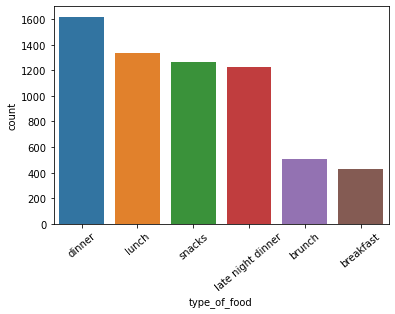

In [163]:
#checking type meal of the day behaviour
sns.countplot(df.type_of_food, order = df.type_of_food.value_counts().index)
plt.xticks(rotation=40)

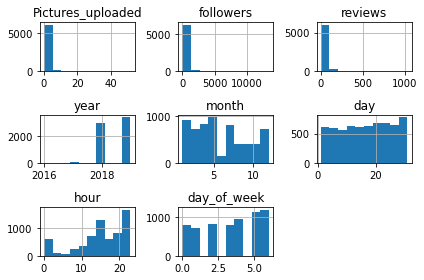

In [164]:
#lets check how distributed are our numercical columns 
df_num.hist()
plt.tight_layout()

<AxesSubplot:>

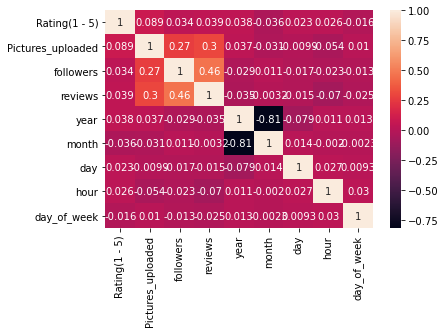

In [165]:
#checking for signicifant features
sns.heatmap(df.corr(), annot = True)

In [166]:
#Looks like non-of them have any significance towards target varibale i,e near to -0.75 pr 0.75

In [167]:
# Lets consider only 'review_text' and 'rating' for the model buidling
df1 = df[['Review_Text', 'Rating(1 - 5)']]

In [168]:
df1.head()

,Review_Text,Rating(1 - 5)
0,"The place was good, ambiance was very nice! Mu...",4.0
1,poor quality,2.0
2,Worst experience with delivery time.. It took ...,1.0
3,What's not to love here ... The best and the m...,5.0
4,worst,1.0


In [169]:
# converting all text to lower
df1['review_lower'] = df1["Review_Text"].str.lower()
#removing all unwanted punctuations
df1['review_no_punctuation'] = df1['review_lower'].str.replace('[^\w\s]','')
#removing all empty rows
df1['clean_review_text'] = df1["review_no_punctuation"].fillna("fillna")

C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [170]:
df1.shape

(6396, 5)

In [171]:
df1.reset_index()

,index,Review_Text,Rating(1 - 5),review_lower,review_no_punctuation,clean_review_text
0,0,"The place was good, ambiance was very nice! Mu...",4.0,"the place was good, ambiance was very nice! mu...",the place was good ambiance was very nice musi...,the place was good ambiance was very nice musi...
1,1,poor quality,2.0,poor quality,poor quality,poor quality
2,2,Worst experience with delivery time.. It took ...,1.0,worst experience with delivery time.. it took ...,worst experience with delivery time it took 2 ...,worst experience with delivery time it took 2 ...
3,3,What's not to love here ... The best and the m...,5.0,what's not to love here ... the best and the m...,whats not to love here the best and the most ...,whats not to love here the best and the most ...
4,4,worst,1.0,worst,worst,worst
...,...,...,...,...,...,...
6391,6395,Jaw dropping ambience!!\n\nThe place is on 13t...,5.0,jaw dropping ambience!!\n\nthe place is on 13t...,jaw dropping ambience\n\nthe place is on 13th ...,jaw dropping ambience\n\nthe place is on 13th ...
6392,6396,U can try just for different environment. Food...,3.0,u can try just for different environment. food...,u can try just for different environment food ...,u can try just for different environment food ...
6393,6397,The worst experience ever. Ordered achari ghos...,1.0,the worst experience ever. ordered achari ghos...,the worst experience ever ordered achari ghosh...,the worst experience ever ordered achari ghosh...
6394,6398,One day my husband got this yummy brownies in ...,5.0,one day my husband got this yummy brownies in ...,one day my husband got this yummy brownies in ...,one day my husband got this yummy brownies in ...


In [172]:
df1.reset_index(inplace = True, drop = True)

<a id='nlp'></a>
# 5.NLP TECHNIQUES

In [174]:
# Initialize empty array 
# to append clean text  
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]',' ',df1['clean_review_text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [175]:
# vectorizing the words 
cv=CountVectorizer()
x = cv.fit_transform(corpus).toarray()
x.shape

(6396, 10959)

In [176]:
# tfidf for giving weight to the words depends on their no of occurences
tfidf = TfidfTransformer()
X = tfidf.fit_transform(x)
X = tfidf.transform(x)

In [177]:
#checking shape
X.shape

(6396, 10959)

In [179]:
df.head()

,Review_Text,Rating(1 - 5),Pictures_uploaded,followers,reviews,year,month,day,hour,day_of_week,type_of_food
0,"The place was good, ambiance was very nice! Mu...",4.0,0,0.0,1.0,2019,5,18,1,5,late night dinner
1,poor quality,2.0,0,4.0,8.0,2018,8,11,14,5,lunch
2,Worst experience with delivery time.. It took ...,1.0,0,1.0,1.0,2018,10,2,14,1,lunch
3,What's not to love here ... The best and the m...,5.0,3,2045.0,36.0,2018,8,18,23,5,late night dinner
4,worst,1.0,0,6.0,1.0,2018,7,25,20,2,dinner


In [180]:
# label encoding for 'type_of_food' feature
LabelEncoder = LabelEncoder()
df_cat['type_of_food'] = LabelEncoder.fit_transform(df_cat['type_of_food'])

C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [181]:
#droping target variable
df_cat.drop('Review_Text', axis=1, inplace=True)

C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [182]:
#checking top 5 records of catergorical dataset
df_cat.head()

,type_of_food
0,3
1,4
2,4
3,3
4,2


In [183]:
#checking top 5 records of numerical dataset
df_num.head()

,Pictures_uploaded,followers,reviews,year,month,day,hour,day_of_week
0,0,0.0,1.0,2019,5,18,1,5
1,0,4.0,8.0,2018,8,11,14,5
2,0,1.0,1.0,2018,10,2,14,1
3,3,2045.0,36.0,2018,8,18,23,5
4,0,6.0,1.0,2018,7,25,20,2


In [232]:
#concatinating both numerical and categorical
df_final = pd.concat([df_cat, df_num], axis=1)

In [185]:
#top 5 records
df_final.head()

,type_of_food,Pictures_uploaded,followers,reviews,year,month,day,hour,day_of_week
0,3,0,0.0,1.0,2019,5,18,1,5
1,4,0,4.0,8.0,2018,8,11,14,5
2,4,0,1.0,1.0,2018,10,2,14,1
3,3,3,2045.0,36.0,2018,8,18,23,5
4,2,0,6.0,1.0,2018,7,25,20,2


In [186]:
# normalizing the dataset
nr = Normalizer()
df_final[df_final.columns] = nr.fit_transform(df_final)

In [187]:
#checking shape
df_final.shape

(6396, 9)

In [188]:
#coverting it to sparse matrix to reduce dimension
spar = pd.DataFrame.sparse.from_spmatrix(X) # X output of tf-idf
spar.head()

,0,1,2,3,4,5,6,7,8,9,...,10949,10950,10951,10952,10953,10954,10955,10956,10957,10958
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (6396, 10959)
Amount of Non-Zero occurrences:  147436
Density: 0.21034110823325167


In [190]:
#checking shape
spar.shape

(6396, 10959)

<a id='label'></a>
# 6.LABEL ENCODING

In [195]:
#label encoding for target variable 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df1['Rating(1 - 5)'])

In [196]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,10958,type_of_food,Pictures_uploaded,followers,reviews,year,month,day,hour,day_of_week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001486,0.000000,0.000000,0.000495,0.999953,0.002476,0.008915,0.000495,0.002476
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001982,0.000000,0.001982,0.003964,0.999938,0.003964,0.005451,0.006937,0.002478
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001982,0.000000,0.000496,0.000496,0.999961,0.004955,0.000991,0.006937,0.000496
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001044,0.001044,0.711693,0.012529,0.702296,0.002784,0.006264,0.008004,0.001740
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000991,0.000000,0.002973,0.000495,0.999863,0.003468,0.012387,0.009909,0.000991


In [197]:
final.shape

(6392, 10968)

In [198]:
X.shape

(6396, 10959)

In [199]:
y.shape

(6396,)

<a id='target'></a>
# 7.TARGET VARIABLE VISUALISATION

<AxesSubplot:ylabel='count'>

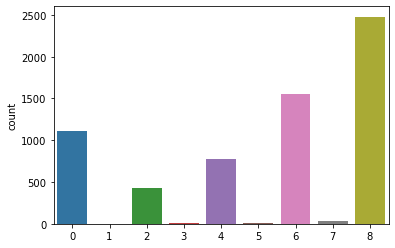

In [236]:
sns.countplot(y)# checking target variable whether it is imbalanced or balanced dataset

<a id='base'></a>

# 8.MODEL BUILDING

In [200]:
# Splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [201]:
#Creating Result Tabulation
result_tab=pd.DataFrame(columns=['Model_name','Model'])

In [202]:
#Building models and evaluating metrics




def print_score(model,clf, X_train, y_train, X_test, y_test, train=True):
    global result_tab
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
        y_pred=i.predict(x_test)
        
        pred_prob1 = i.predict_proba(x_test)
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        confusion_mat=confusion_matrix(y_pred,y_test)
        print(confusion_mat)
        
        plt.plot(fpr1, tpr1, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print()
        
        modd=pd.Series({'Model_name':str(model)[0:10],
                        'Model': str(i),
                    'Precision Score': metrics.precision_score(y_test, y_pred,average = 'weighted'),
                    'Recall Score': metrics.recall_score(y_test, y_pred, average = 'weighted'),
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                    'f1-score': f1_score(y_test, y_pred,average = 'weighted'),
                    "accuracy_score": accuracy_score(y_pred,y_test),
                   "confusion matrix":confusion_matrix(y_pred,y_test)})
                    #'Sensitivity':100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1]),
                    #'Specificity': 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[1][0])})
        
        result_tab=result_tab.append(modd,ignore_index=True)
        
    return result_tab

LogisticRegression(multi_class='ovr')
Train Result:

accuracy score: 0.7551

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       905
           1       0.00      0.00      0.00         3
           2       0.95      0.11      0.20       323
           3       0.00      0.00      0.00         6
           4       0.81      0.41      0.55       612
           5       0.00      0.00      0.00        10
           6       0.69      0.69      0.69      1231
           7       0.00      0.00      0.00        24
           8       0.77      0.94      0.85      2002

    accuracy                           0.76      5116
   macro avg       0.44      0.34      0.35      5116
weighted avg       0.76      0.76      0.72      5116




C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Average Accuracy: 	 0.6271
Accuracy SD: 		 0.0165
[[160  45  34   1  15   0   3]
 [  4   0   3   0   1   0   2]
 [  7  13  18   0   9   0   0]
 [  0   0   0   0   0   0   0]
 [  9  24  67   3 147   0  56]
 [  0   0   0   0   0   0   0]
 [ 21  20  40   1 156   5 416]]


C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


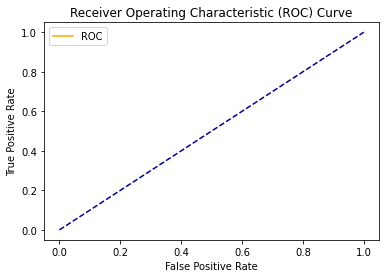

C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MultinomialNB()
Train Result:

accuracy score: 0.6474

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       905
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00       323
           3       0.00      0.00      0.00         6
           4       0.80      0.01      0.01       612
           5       0.00      0.00      0.00        10
           6       0.57      0.54      0.55      1231
           7       0.00      0.00      0.00        24
           8       0.63      0.98      0.77      2002

    accuracy                           0.65      5116
   macro avg       0.31      0.25      0.24      5116
weighted avg       0.63      0.65      0.57      5116




C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Average Accuracy: 	 0.5446
Accuracy SD: 		 0.0172
[[126  24  12   0   6   0   1]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [ 24  44  66   1  93   0  18]
 [  0   0   0   0   0   0   0]
 [ 51  34  84   4 229   5 458]]


C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


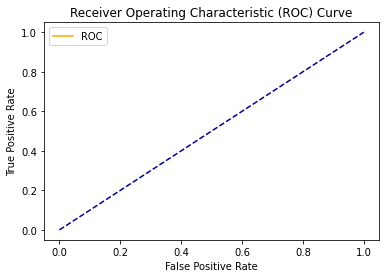

C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier()
Train Result:

accuracy score: 0.9820

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       905
           1       1.00      1.00      1.00         3
           2       0.98      0.97      0.98       323
           3       1.00      1.00      1.00         6
           4       0.98      0.97      0.98       612
           5       1.00      1.00      1.00        10
           6       1.00      0.96      0.98      1231
           7       1.00      1.00      1.00        24
           8       0.97      1.00      0.98      2002

    accuracy                           0.98      5116
   macro avg       0.99      0.99      0.99      5116
weighted avg       0.98      0.98      0.98      5116




C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Average Accuracy: 	 0.6030
Accuracy SD: 		 0.0141


C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[[160  44  40   1  13   0   6]
 [  4   2   3   0   0   0   2]
 [  4   7  11   0   6   0   2]
 [  0   0   0   0   0   0   0]
 [  7  25  53   2 105   0  28]
 [  0   0   0   0   0   0   0]
 [ 26  24  55   2 204   5 439]]


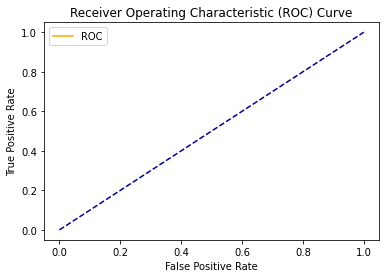

C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier(objective='multi:softprob')
Train Result:

accuracy score: 0.6947

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       905
           1       1.00      1.00      1.00         3
           2       0.95      0.18      0.30       323
           3       1.00      0.67      0.80         6
           4       0.81      0.36      0.50       612
           5       1.00      0.80      0.89        10
           6       0.68      0.56      0.61      1231
           7       1.00      0.79      0.88        24
           8       0.66      0.92      0.77      2002

    accuracy                           0.69      5116
   macro avg       0.87      0.67      0.73      5116
weighted avg       0.72      0.69      0.67      5116




C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Average Accuracy: 	 0.5858
Accuracy SD: 		 0.0138


C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[[135  38  25   1   9   0   6]
 [  5   2   3   0   1   0   0]
 [  4  10  24   0  14   0   2]
 [  0   0   0   0   0   0   0]
 [ 10  20  53   2 116   0  55]
 [  0   0   0   0   0   0   0]
 [ 47  32  57   2 188   5 414]]


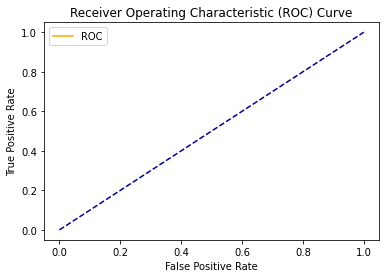

C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [203]:
models=[LogisticRegression(multi_class='ovr'),MultinomialNB(), RandomForestClassifier(), XGBClassifier()]


for i in models:
    
    clf = i
    clf.fit(x_train, y_train)
    print(clf)
    print_score('Base',clf, x_train, y_train, x_test, y_test, train=True)
    

In [204]:
result_tab

,Model_name,Model,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,Base,LogisticRegression(multi_class='ovr'),0.578906,0.406876,0.504198,0.578906,0.578906,"[[160, 45, 34, 1, 15, 0, 3], [4, 0, 3, 0, 1, 0...",0.523038
1,Base,MultinomialNB(),0.528906,0.305361,0.411265,0.528906,0.528906,"[[126, 24, 12, 0, 6, 0, 1], [0, 0, 0, 0, 0, 0,...",0.444348
2,Base,RandomForestClassifier(),0.560156,0.371750,0.495050,0.560156,0.560156,"[[160, 44, 40, 1, 13, 0, 6], [4, 2, 3, 0, 0, 0...",0.489163
3,Base,XGBClassifier(objective='multi:softprob'),0.539844,0.342234,0.493001,0.539844,0.539844,"[[135, 38, 25, 1, 9, 0, 6], [5, 2, 3, 0, 1, 0,...",0.487412


In [205]:
X.shape

(6396, 10959)

In [206]:
y.shape

(6396,)

<a id='oversampler'></a>

# 9.HANDLING IMBALANCED DATASET USING OVERSAMPLING TECHNIQUE

In [208]:
fit_ov = RandomOverSampler()
x_re, y_re = fit_ov.fit_resample(X,y)

In [209]:
x_re.shape

(22311, 10959)

In [210]:
y_re.shape

(22311,)

<AxesSubplot:ylabel='count'>

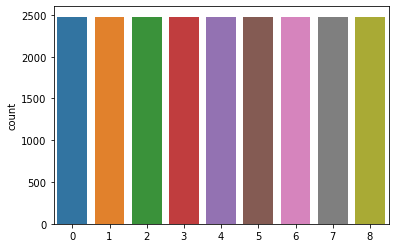

In [211]:
sns.countplot(y_re)

In [212]:
# Splitting data into train and test

x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.3,random_state=1)

LogisticRegression(multi_class='ovr')
Train Result:

accuracy score: 0.9101

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      1774
           1       1.00      1.00      1.00      1716
           2       0.87      0.88      0.88      1756
           3       1.00      1.00      1.00      1734
           4       0.85      0.82      0.83      1708
           5       0.99      1.00      0.99      1757
           6       0.81      0.75      0.78      1709
           7       0.98      1.00      0.99      1755
           8       0.81      0.83      0.82      1708

    accuracy                           0.91     15617
   macro avg       0.91      0.91      0.91     15617
weighted avg       0.91      0.91      0.91     15617


Average Accuracy: 	 0.8482
Accuracy SD: 		 0.0109
[[594   0  55   0  55   0  25   0  19]
 [  0 763   0   0   0   0   0   0   0]
 [ 70   0 600   0  50   0  45   0  13]
 [  0   0   0 745   0   0

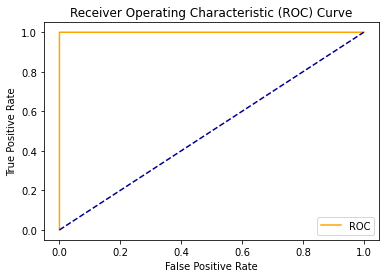


MultinomialNB()
Train Result:

accuracy score: 0.8796

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1774
           1       0.96      1.00      0.98      1716
           2       0.81      0.85      0.83      1756
           3       0.96      1.00      0.98      1734
           4       0.84      0.76      0.80      1708
           5       0.95      1.00      0.98      1757
           6       0.72      0.81      0.76      1709
           7       0.95      1.00      0.97      1755
           8       0.86      0.66      0.75      1708

    accuracy                           0.88     15617
   macro avg       0.88      0.88      0.88     15617
weighted avg       0.88      0.88      0.88     15617


Average Accuracy: 	 0.8240
Accuracy SD: 		 0.0103
[[549   0  52   0  48   0  18   0   8]
 [  3 763   3   0   5   0   1   0   6]
 [ 90   0 579   0  77   0  56   0  20]
 [ 17   0   1 745   1   0   4   0  13]
 [ 22  

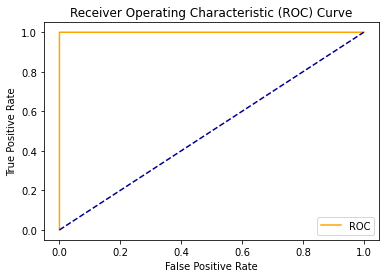


RandomForestClassifier()
Train Result:

accuracy score: 0.9882

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1774
           1       1.00      1.00      1.00      1716
           2       0.99      0.98      0.98      1756
           3       1.00      1.00      1.00      1734
           4       0.98      0.98      0.98      1708
           5       1.00      1.00      1.00      1757
           6       1.00      0.96      0.98      1709
           7       1.00      1.00      1.00      1755
           8       0.93      0.99      0.96      1708

    accuracy                           0.99     15617
   macro avg       0.99      0.99      0.99     15617
weighted avg       0.99      0.99      0.99     15617


Average Accuracy: 	 0.9188
Accuracy SD: 		 0.0085
[[672   0   6   0  23   0  21   0  13]
 [  0 763   0   0   0   0   0   0   0]
 [ 10   0 693   0   1   0   6   0  10]
 [  0   0   0 745   0   0   0   0   0

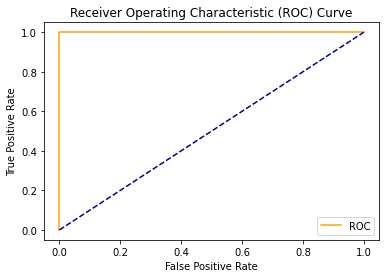


XGBClassifier(objective='multi:softprob')
Train Result:

accuracy score: 0.8290

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1774
           1       1.00      1.00      1.00      1716
           2       0.62      0.74      0.68      1756
           3       1.00      1.00      1.00      1734
           4       0.77      0.61      0.68      1708
           5       1.00      1.00      1.00      1757
           6       0.68      0.63      0.65      1709
           7       0.97      1.00      0.98      1755
           8       0.70      0.71      0.71      1708

    accuracy                           0.83     15617
   macro avg       0.83      0.83      0.83     15617
weighted avg       0.83      0.83      0.83     15617


Average Accuracy: 	 0.7863
Accuracy SD: 		 0.0112
[[502   0 133   0  56   0  29   0  22]
 [  0 763   0   0   0   0   0   0   1]
 [147   0 484   0 139   0  73   0  56]
 [  0   0   0 745   

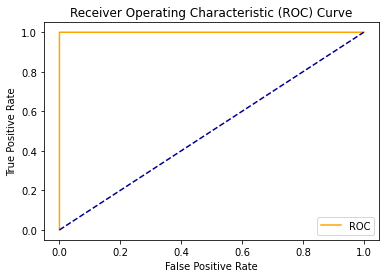

In [213]:
models=[LogisticRegression(multi_class='ovr'),MultinomialNB(), RandomForestClassifier(), XGBClassifier()]


for i in models:
    
    clf = i
    clf.fit(x_train, y_train)
    print(clf)
    print_score('oversampling',clf, x_train, y_train, x_test, y_test, train=True)

In [214]:
result_tab

,Model_name,Model,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,Base,LogisticRegression(multi_class='ovr'),0.578906,0.406876,0.504198,0.578906,0.578906,"[[160, 45, 34, 1, 15, 0, 3], [4, 0, 3, 0, 1, 0...",0.523038
1,Base,MultinomialNB(),0.528906,0.305361,0.411265,0.528906,0.528906,"[[126, 24, 12, 0, 6, 0, 1], [0, 0, 0, 0, 0, 0,...",0.444348
2,Base,RandomForestClassifier(),0.560156,0.371750,0.495050,0.560156,0.560156,"[[160, 44, 40, 1, 13, 0, 6], [4, 2, 3, 0, 0, 0...",0.489163
3,Base,XGBClassifier(objective='multi:softprob'),0.539844,0.342234,0.493001,0.539844,0.539844,"[[135, 38, 25, 1, 9, 0, 6], [5, 2, 3, 0, 1, 0,...",0.487412
4,oversampli,LogisticRegression(multi_class='ovr'),0.849417,0.830600,0.846550,0.849417,0.849417,"[[594, 0, 55, 0, 55, 0, 25, 0, 19], [0, 763, 0...",0.847471
5,oversampli,MultinomialNB(),0.826710,0.805063,0.829973,0.826710,0.826710,"[[549, 0, 52, 0, 48, 0, 18, 0, 8], [3, 763, 3,...",0.823462
6,oversampli,RandomForestClassifier(),0.916044,0.905541,0.916826,0.916044,0.916044,"[[672, 0, 6, 0, 23, 0, 21, 0, 13], [0, 763, 0,...",0.916128
7,oversampli,XGBClassifier(objective='multi:softprob'),0.780550,0.753165,0.781444,0.780550,0.780550,"[[502, 0, 133, 0, 56, 0, 29, 0, 22], [0, 763, ...",0.778703


In [ ]:
## Comment:
+ we can conclude that "RandomForestClassifier" gave best accuracy score and f1 score compared to other models.

<a id='test'></a>
# 10. Testing

In [215]:
test = pd.read_excel('Foodie_Community_Test.xlsx')
test.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Reviews & Followers,Time,Pictures_uploaded
0,Mustang Terrace Lounge,Sirisha Kandula,Could be one of the best place in gachibowli.\...,"1 Review , 1 Follower",2019-05-06 20:33:59.999999,0
1,Shanghai Chef 2,Susmita Basu,I loved the food. Authentic Chinese and nice a...,"17 Reviews , 48 Followers",2018-08-18 15:43:00.000000,4
2,Eat India Company,Ananth Popuri,I love this place in Gachibowli. I have been h...,"12 Reviews , 4 Followers",2019-03-09 15:37:00.000000,0
3,Sardarji's Chaats & More,RAHUL DEY,"Too bad service, does not accept the Order mul...","5 Reviews , 999 Followers",2018-12-07 21:38:00.000000,0
4,Cream Stone,Kiran,ordered nuts overloaded ice cream.fantastic ta...,"11 Reviews , 1 Follower",2018-11-24 13:40:00.000001,0


In [234]:
#checking dimension of test dataset
test.shape

(1600, 9)

In [216]:
test.isnull().sum()

Restaurant_Name        0
Reviewer_Name          0
Review_Text            1
Reviews & Followers    0
Time                   0
Pictures_uploaded      0
dtype: int64

In [217]:
test['Review_Text'].fillna(test['Review_Text'].mode()[0], inplace = True)

In [218]:
# converting all text to lower
test['review_lower'] = test["Review_Text"].str.lower()
#removing all unwanted punctuations
test['review_no_punctuation'] = test['review_lower'].str.replace('[^\w\s]','')
#removing all empty rows
test['clean_review_text'] = test["review_no_punctuation"].fillna("fillna")

In [219]:
# Initialize empty array 
# to append clean text  
corpus1 = []
for i in range(0, len(test)):
    review1 = test['clean_review_text'][i]
    review1 = review1.lower()
    review1 = review1.split()
    review1 = [ps.stem(word) for word in review1 if not word in stopwords.words('english')]
    review1 = ' '.join(review1)
    corpus1.append(review1)

<a id='rf'></a>
# 11. Best modelis RandomForestClassifier with oversampling with accuracy_score = 0.91% and f_score = 0.92%

In [220]:
best = RandomForestClassifier()
best.fit(x_train,y_train)

RandomForestClassifier()

In [221]:
test['clean_review_text']

0       could be one of the best place in gachibowli\n...
1       i loved the food authentic chinese and nice am...
2       i love this place in gachibowli i have been he...
3       too bad service does not accept the order mult...
4        ordered nuts overloaded ice creamfantastic taste
                              ...                        
1595    amazing food anyone who wants to have deliciou...
1596    driven cafe comes with a perfect ambience that...
1597                                                ok ok
1598                                                 good
1599    it was an awesome experiencethe staff speciall...
Name: clean_review_text, Length: 1600, dtype: object

In [222]:
def check(msg):
    v = cv.transform([msg])
    
    prec = best.predict(v)
    return prec

In [223]:
check('could be one of the best place in gachibowli\nan underrated place from here you can see the skyline of gachibowlian awesome place\nservice is good value for money')

array([8], dtype=int64)

In [224]:
pred_text = []
for i in test['clean_review_text']:
    pred_text.append(check(i))

In [225]:
df_pred_text = pd.DataFrame(pred_text)

In [226]:
df_pred_text.columns = ['Pred']

In [227]:
df_pred_text.Pred

0       8
1       8
2       8
3       0
4       8
       ..
1595    8
1596    8
1597    4
1598    8
1599    8
Name: Pred, Length: 1600, dtype: int64

In [228]:
df_pred_text['Pred'] = label_encoder.inverse_transform(df_pred_text['Pred'])

In [229]:
result=pd.concat([test['Review_Text'],df_pred_text['Pred']],axis=1)

In [230]:
result.head()

,Review_Text,Pred
0,Could be one of the best place in gachibowli.\...,5.0
1,I loved the food. Authentic Chinese and nice a...,5.0
2,I love this place in Gachibowli. I have been h...,5.0
3,"Too bad service, does not accept the Order mul...",1.0
4,ordered nuts overloaded ice cream.fantastic ta...,5.0


<a id="export"></a>
# 12. Exporting the results

In [233]:
result.to_csv('final_result.csv', index=False)